In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# General functions

In [2]:
def plot_potential (X, pot) :
    figure(figsize=(6, 4), dpi=120)
    plot(X, pot(X))
    xlabel('$x$')
    ylabel('$U(x)$')
    title("Potential")

In [3]:
def norm_vect (a, dx) :
    if (not sum(a))==0 :
        s = sign(sum(a))
    return (s*a/(sum(abs(a))*dx))

In [4]:
def plot_eigenvalues (eigs) :
    figure(figsize=(6, 1), dpi=120)
    xlabel("$\mu$")
    title("Eigenvalues")
    semilogx(abs(valss), 0.*ones(len(valss)),'o')

## Dynamics (discretized Fokker-Planck)

In [9]:
def define_dynamics(X, pot) :
    npts = len(X)
    dx=X[1]-X[0]
    
    mat=zeros((npts,npts))
    for i in range(1,npts-1) :
        mat[i-1,i] = exp((pot(X[i])-pot(X[i-1]))/2.)
        mat[i+1,i] = exp((pot(X[i])-pot(X[i+1]))/2.)
        mat[i,i]   = - mat[i-1,i] - mat[i+1,i]
    mat[1,0] = exp((pot(X[0])-pot(X[1]))/2.)
    mat[0,0] = - exp((pot(X[0])-pot(X[1]))/2.)

    mat[-2,-1] = exp((pot(X[-1])-pot(X[-2]))/2.)
    mat[-1,-1] = - exp((pot(X[-1])-pot(X[-2]))/2.)

    return mat/dx**2

# Parabolic well

In [6]:
k=1

def U_par(x) :
    return k*x**2/2

In [7]:
xmax = 10
npts = 400
X = linspace(-xmax, xmax, num=npts)

In [8]:
M = define_dynamics(X, U_par)

In [9]:
vals, vects = eig(-M)

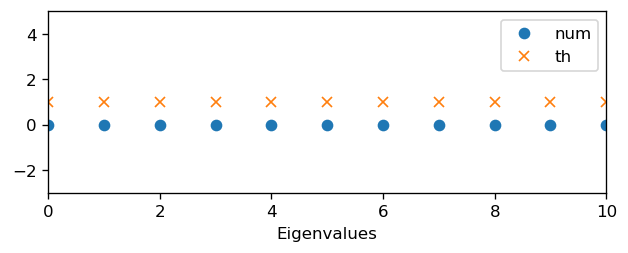

In [10]:
figure(figsize=(6, 2), dpi=120)
plot(vals, zeros(len(vals)), 'o', label='num')
plot(np.linspace(0, 10*k, num=11), zeros(11)+1, 'x', label='th')
xlim([0,10])
ylim([-3,5])
xlabel('Eigenvalues')
legend()
show()

# Double well

## Definition of the potential

In [34]:
def U(x) :
    return 3*(.1*x**4-0.8*x**2+.2*x)

In [45]:
npts = 50
X = linspace(-5,5,npts)

(-10.0, 20.0)

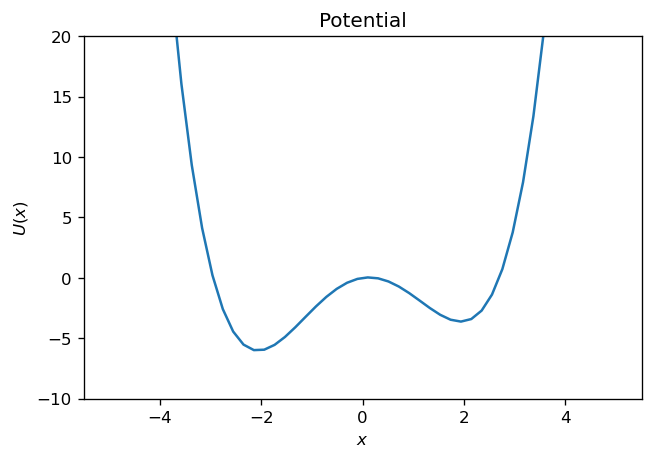

In [46]:
plot_potential(X, U)
ylim([-10,20])

# Solution

## Eigenvalues

In [47]:
M = define_dynamics(X, U)

vals, vects = eig(-M)

vals = real(vals)
valss = sort(vals)

l0 = valss[0]
l1 = valss[1]
l2 = valss[2]
p0 = real(vects[:,where(vals == l0)[0][0]])
p1 = real(vects[:,where(vals == l1)[0][0]])

dx = X[1]-X[0]
p0 = norm_vect(p0, dx)
p1 = norm_vect(p1, dx)

print("Smallest non-vanishing eigenvalue:", l1)
print("Second eigenvalue:", l2)
print("Third eigenvalue:", valss[3])

Smallest non-vanishing eigenvalue: 0.026665565559369848
Second eigenvalue: 3.9652385976862328
Third eigenvalue: 6.3955998733625


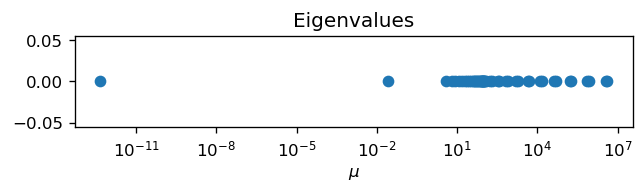

In [48]:
plot_eigenvalues(vals)

## Eigenvectors

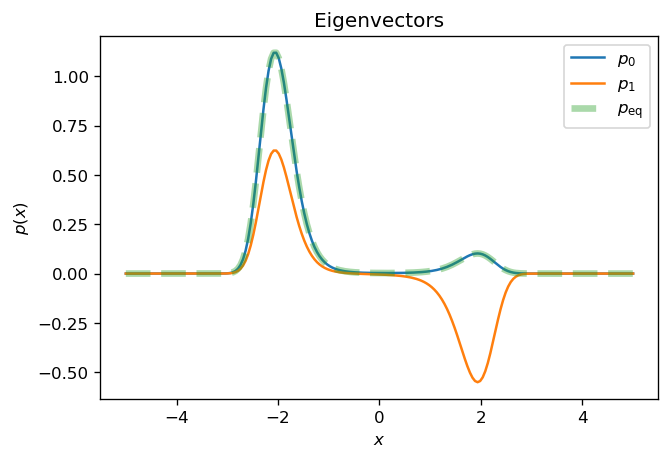

In [21]:
peq=exp(-U(X))
peq=norm_vect(peq, dx)

figure(figsize=(6, 4), dpi=120)
xlabel("$x$")
ylabel("$p(x)$")
title("Eigenvectors")
plot(X,p0,label="$p_0$")
plot(X,p1,label="$p_1$")
plot(X,peq,'--',lw=4,alpha=.4,label="$p_\\mathrm{eq}$")
legend(loc=0)

## Decomposition into left and right modes

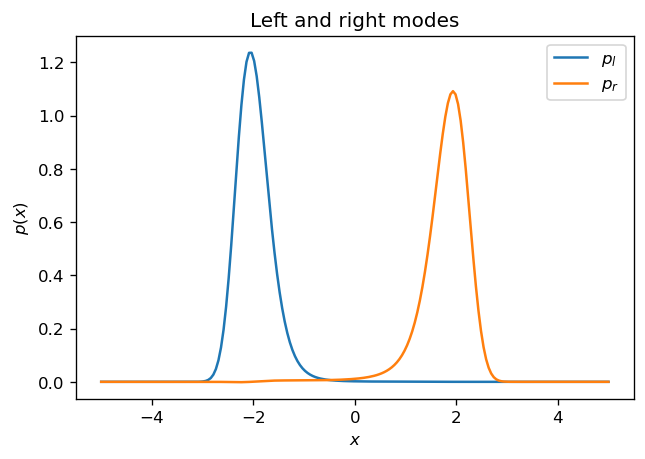

In [22]:
p0l = p0[:npts//2]
p0r = p0[npts//2:]
p1l = p1[:npts//2]
p1r = p1[npts//2:]
s = sign(p1r[where(abs(p1r)==max(abs(p1r)))[0][0]])
pl = p0 - s*(max(p0r)/max(abs(p1r)))*p1
pr = p0 + s*(max(p0l)/max(abs(p1l)))*p1

figure(figsize=(6, 4), dpi=120)
xlabel("$x$")
ylabel("$p(x)$")
title("Left and right modes")

plot(X,pl,label="$p_l$")
plot(X,pr,label="$p_r$")
legend(loc=0)


## Prediction

In [23]:
def analytic(X, pot) :
    dx = X[1]-X[0]
    UU = U(X)
    
    # Find local extrema
    U2 = sign((UU[1:-1]-UU[:-2])*(UU[1:-1]-UU[2:]))
    I = where(U2 == 1.)[0]
    
    Xm = X[I]
    Um = UU[I]
    Ums = sort(Um)
    
    U2m = [(UU[i+1]-2*UU[i]+UU[i-1])/dx**2 for i in I]
        
    umax = Ums[-1]
    umin = Ums[1]
    imax = where(Um == umax)[0][0]
    imin = where(Um == umin)[0][0]
    u2max = U2m[imax]
    u2min = U2m[imin]
    
    return sqrt(abs(u2max*u2min))*exp(umin-umax)/(2*pi), sort(U2m)

In [25]:
print(sort(vals)[0:3])
mu0, mu1 = analytic(X, U)
print(mu0, mu1)

[1.15350979e-12 2.61812599e-02 3.95160151e+00]
0.02579585403364813 [-4.77803086  7.9852832  10.85793793]


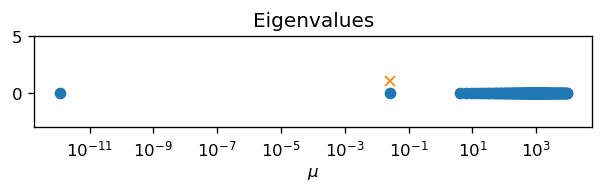

In [26]:
plot_eigenvalues(vals)
plot([mu0], [1], 'x')
ylim([-3,5])
show()

## Export

In [21]:
A_vals = np.zeros((npts, 2))
A_vals[:,0] = valss
A_vals
savetxt("vals.dat", A_vals)

In [22]:
A = np.zeros((npts,6))
A[:,0] = X
A[:,1] = U(X)
A[:,2] = p0
A[:,3] = p1
A[:,4] = pl
A[:,5] = pr
savetxt("x_u_p.dat", A)

In [23]:
dx = X[1]-X[0]
UU = U(X)
    
# Find local extrema
U2 = sign((UU[1:-1]-UU[:-2])*(UU[1:-1]-UU[2:]))
I = where(U2 == 1.)[0]
    
Xm = X[I]
Um = UU[I]
U2m = [(UU[i+1]-2*UU[i]+UU[i-1])/dx**2 for i in I]

A_ext = np.zeros((3, 3))
A_ext[:,0] = Xm
A_ext[:,1] = Um
A_ext[:,2] = U2m
savetxt("xm_um_u2m.dat", A_ext)

# Potential with 3 local minima

In [27]:
def V(x) :
    return 15*(.1*x**6-.65*x**4+x**2+.05*x)

In [28]:
npts = 400
X = linspace(-3,3,npts)
dx=X[1]-X[0]

(-7.0, 12.0)

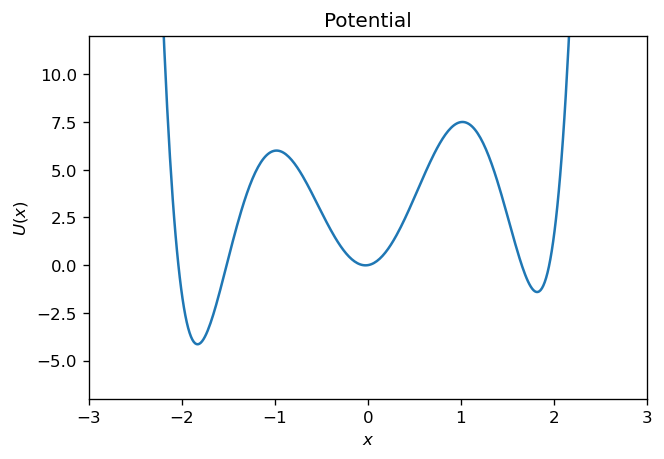

In [29]:
plot_potential(X, V)

xlim(-3,3)
ylim(-7,12)

In [30]:
N=define_dynamics(X, V)

In [31]:
vals, vects = eig(-N)

vals = real(vals)
valss = sort(vals)

l0 = valss[0]
l1 = valss[1]
l2 = valss[2]
l3 = valss[3]
p0 = real(vects[:,where(vals == l0)[0][0]])
p1 = real(vects[:,where(vals == l1)[0][0]])
p2 = real(vects[:,where(vals == l2)[0][0]])

p0 = norm_vect(p0, dx)
p1 = norm_vect(p1, dx)
p2 = norm_vect(p2, dx)

print("Smallest non-vanishing eigenvalue:", l1)
print("Second eigenvalue:", l2)
print("Third eigenvalue:", l3)

Smallest non-vanishing eigenvalue: 0.0013186364688029793
Second eigenvalue: 0.01614036079289049
Third eigenvalue: 23.997484672327975


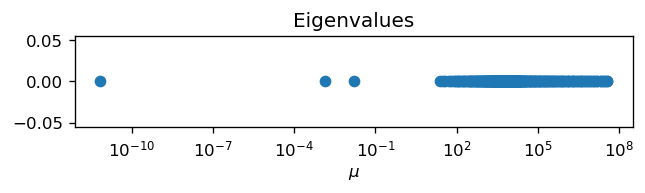

In [32]:
plot_eigenvalues(vals)

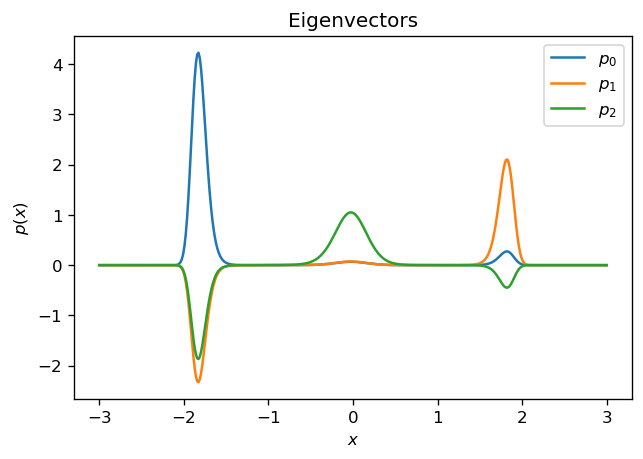

In [33]:
figure(figsize=(6, 4), dpi=120)
xlabel("$x$")
ylabel("$p(x)$")
title("Eigenvectors")

plot(X,p0,label="$p_0$")
plot(X,p1,label="$p_1$")
plot(X,p2,label="$p_2$")

legend(loc=0)
